# Machine Learning

In this homework we will gain experience on Applied Machine Learning, exploring an interesting dataset about soccer players and referees. 

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random
pd.options.mode.chained_assignment = None  # default='warn'
import sklearn as sk
from sklearn import preprocessing, ensemble
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import learning_curve


/Users/peco/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("CrowdstormingDataJuly1st.csv")

## 1. Data cleaning and exploration

Describe and observe (10 first rows) the data

In [3]:
df.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,641.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1604.000000,21.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2345.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [4]:
df.ix[:10,:10]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1


In [5]:
df.ix[:10,10:30]


,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,1,0,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,0,0,0,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,0,1,0,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,1,0,0,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,0,0,0,0,0,0,36499.jpg,0.00,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


### Dyad organization
The data is actually organized as [dyad](http://en.wikipedia.org/wiki/Dyad_(sociology).


As explained [here](http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb), the data is organized as dyad, so each row corresponds to a player and a referee relationship. Some players encoutered a referee only once, and some players encoutered a referee several time, but this will still be represented as 1 line.

What will be done is disagregate the data so that each corrresponds to one referee-player encouter. To disagrate, we will use the number of *games* , and consider that a maximum of 1 *red card* is possible by encouter.

In [7]:
print(df.shape)
len_disagregate = sum(df['games']); ## all games
disagregate = np.zeros(shape = [len_disagregate, df.shape[1]], dtype=object)
df['allreds']=df['yellowReds']+df['redCards']

j=0
for i, row in df.iterrows():
    row_red = row['allreds']
    for game in range(row['games']):
        row['allreds'] = 1 if (row_red - game > 0) else 0
        disagregate[j] = row
        j+=1
        
pd.DataFrame(disagregate, columns=list(df.columns)).to_csv('crowdstorm_disaggregated.csv', index=False) 

(146028, 29)


## Reload Data

In [8]:
df = pd.read_csv("crowdstorm_disaggregated.csv")

Also as explained [here](http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb), there is an interesting fact about the dyads. A referee should have at least 22 relations with players, which would mean 1 match of 2 teams (composed of 11 players each), but some referees have less, as shown below:

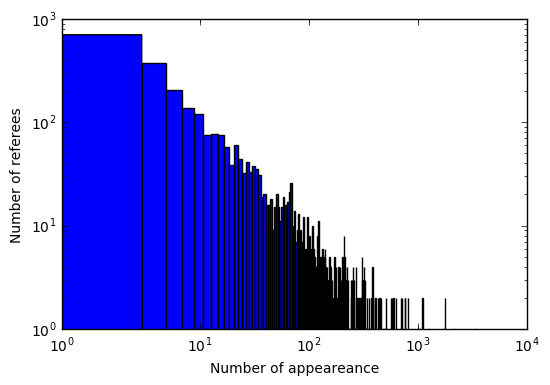

In [9]:
all_refs = df['refNum'].value_counts()
number_all_refs = len(all_refs)
plt.hist(all_refs, log=True, bins = number_all_refs)
plt.xscale('symlog')
plt.ylabel('Number of referees')
plt.xlabel('Number of appeareance')

From the graph, we can see that around 1000 referees have encoutered less than 10 players. This will be problematic in our analysis, and hence **we will eliminate all the referes that have less than 22 encouters**

In [10]:
df=df[df['refNum'].isin(all_refs[all_refs>=22].index.values)]

### Null Data
Are there any null data ?

In [11]:
df.isnull().any()

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height            True
weight            True
position          True
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID           True
rater1            True
rater2            True
refNum           False
refCountry       False
Alpha_3          False
meanIAT           True
nIAT              True
seIAT             True
meanExp           True
nExp              True
seExp             True
allreds          False
dtype: bool

We can see that some data are missing, and this is especially the case for *rater1* and *rater2*. We will drop the rows where some data are missing.

In [12]:
df.count()
df = df.dropna()
df.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,allreds
count,342040.000000,342040.000000,342040.000000,342040.000000,342040.000000,342040.000000,342040.000000,342040.000000,342040.000000,342040.000000,...,342040.000000,342040.000000,342040.000000,342040.000000,3.420400e+05,3.420400e+05,342040.000000,3.420400e+05,342040.000000,342040.000000
mean,181.975383,76.338270,7.540960,3.401973,1.809437,2.329549,0.876213,1.005268,0.028131,0.029956,...,0.297489,1514.730344,23.966489,0.345951,1.630560e+04,2.696038e-04,0.438895,1.698202e+04,0.001291,0.008230
std,6.818565,7.125372,6.605916,3.590544,1.950442,2.436658,1.776391,1.418988,0.170501,0.174616,...,0.286860,897.367188,23.828129,0.023734,8.196159e+04,1.489935e-03,0.160715,8.425711e+04,0.007926,0.090346
min,161.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,1.000000,-0.047254,7.000000e+00,2.235373e-07,-1.375000,8.000000e+00,0.000001,0.000000
25%,178.000000,71.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,681.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225,0.000000
50%,183.000000,76.000000,6.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.250000,1614.000000,8.000000,0.336628,3.219000e+03,1.277387e-04,0.356446,3.351000e+03,0.000575,0.000000
75%,187.000000,81.000000,11.000000,5.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.250000,2293.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002,0.000000
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,...,1.000000,3147.000000,153.000000,0.573793,1.975803e+06,7.333041e-02,1.800000,2.029548e+06,0.329309,1.000000


### Aggregation of the data
We will aggregate the data by players.

**Assumptions** :
    - clubs do not change as it is over 1 season.
    - position does not change as it is over 1 season.

We need to keep only players information, not referee information. We will hence **drop** information that is linked to the referees, or that are useless for the rest of the analysis:
    - refNum     (belongs to referee)
    - refCountry (belongs to referee)
    - playerShort (useless)
    - player
    - photoID
    
there are still variables that are linked to the referees, we will deal with it later.

In [13]:
df['playerShort'].value_counts()[1:10]

xavi               805
iker-casillas      790
steven-gerrard     764
jamie-carragher    755
rio-ferdinand      722
paul-scholes       712
john-arne-riise    712
mark-schwarzer     697
john-terry         696
Name: playerShort, dtype: int64

In [14]:
df_p = df.groupby('playerShort', as_index=False,sort=True)
aggregation = {'club':'max',
               'leagueCountry':'max',
               'birthday':'max',
               'height':'mean',
               'weight':'mean', 
               'position':'max',
               'games':'sum',
               'victories':'sum',
               'ties':'sum',
               'defeats':'sum',
               'goals':'sum',
               'rater1':'mean',
               'rater2':'mean',
               'yellowCards':'sum',
               'redCards':'sum',
               'meanIAT':'mean',
               'nIAT':'max',
               'seIAT':'mean',
               'meanExp':'mean',
               'nExp':'mean',
               'seExp':'mean'
              }
df_p = df_p.agg(aggregation)
df_p.drop(['playerShort'],inplace=True,axis=1,errors='ignore')
df_p.describe()

,ties,nIAT,rater2,yellowCards,games,height,seIAT,meanIAT,seExp,defeats,weight,goals,rater1,meanExp,victories,nExp,redCards
count,1418.000000,1.418000e+03,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.00000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,436.459803,3.543916e+05,0.304126,242.483780,1818.977433,182.159379,0.000293,0.347126,0.001399,561.917489,76.263047,211.35402,0.261460,0.444205,820.600141,14634.828780,7.225670
std,464.389587,7.212591e+05,0.292711,290.131377,1963.852817,6.799995,0.000390,0.014516,0.001957,573.695929,7.105262,428.63188,0.293726,0.101160,1019.439932,20973.932803,13.087291
min,0.000000,1.021000e+03,0.000000,0.000000,1.000000,161.000000,0.000010,0.287530,0.000037,0.000000,55.000000,0.00000,0.000000,0.065271,0.000000,500.333333,0.000000
25%,124.000000,4.479100e+04,0.000000,54.000000,508.000000,178.000000,0.000120,0.336628,0.000547,173.000000,71.000000,14.00000,0.000000,0.361671,197.000000,3310.080483,0.000000
50%,288.000000,4.479100e+04,0.250000,148.000000,1204.000000,182.500000,0.000229,0.340851,0.001002,384.500000,76.000000,69.00000,0.250000,0.402253,497.000000,7848.075000,1.000000
75%,581.500000,4.479100e+04,0.500000,320.000000,2426.500000,187.000000,0.000306,0.361154,0.001437,749.750000,81.000000,221.50000,0.250000,0.551277,1068.750000,18138.787157,9.750000
max,3559.000000,1.975803e+06,1.000000,2361.000000,16932.000000,203.000000,0.009063,0.396512,0.045650,4269.000000,100.000000,5141.00000,1.000000,1.031407,10092.000000,414045.840000,121.000000


In [15]:
df_p.head()

,ties,nIAT,club,rater2,yellowCards,position,birthday,games,height,seIAT,...,seExp,leagueCountry,defeats,weight,goals,rater1,meanExp,victories,nExp,redCards
0,2416,44791.0,Fulham FC,0.00,199,Center Back,08.11.1979,8582,182.0,0.000112,...,0.000523,England,3015,71.0,103,0.25,0.398671,3151,38935.249231,0
1,655,1975803.0,Werder Bremen,0.25,343,Attacking Midfielder,04.09.1986,2973,183.0,0.000127,...,0.000561,Germany,1120,73.0,584,0.00,0.380945,1198,13330.417910,13
2,1281,44791.0,Tottenham Hotspur,0.25,160,Right Midfielder,16.04.1987,5468,165.0,0.000128,...,0.000667,England,1627,63.0,387,0.25,0.399459,2560,38816.876214,0
3,296,1975803.0,Arsenal FC,0.00,204,Center Midfielder,26.12.1990,1624,178.0,0.000266,...,0.001415,England,446,76.0,213,0.00,0.430197,882,42061.228346,1
4,197,7749.0,Montpellier HSC,0.25,35,Center Back,17.03.1990,596,180.0,0.000841,...,0.003108,France,201,73.0,7,0.25,0.328895,198,2969.766129,10


Distribution of skin color. There are 2 indicators for the skin color : *rater1* and *rater2*. Let's have a look at them

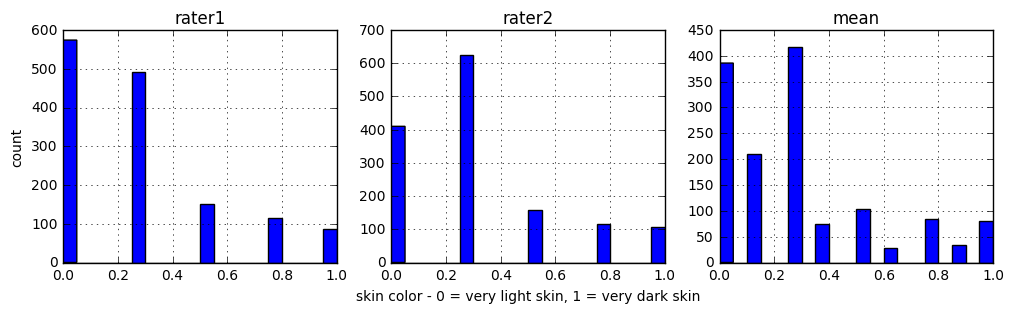

In [16]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12, 3))
df_p['rater1'].hist(ax=ax[0], bins=20)
ax[0].set_ylabel('count')
ax[0].set_title('rater1')

df_p['rater2'].hist(ax=ax[1], bins=20)
ax[1].set_xlabel('skin color - 0 = very light skin, 1 = very dark skin')
ax[1].set_title('rater2')

#mean
mean_rater = (df_p['rater2'] + df_p['rater1'])/2
(mean_rater).hist(ax=ax[2], bins=20)
ax[2].set_title('mean')


How many different values are there in rater1, rater2 and mean ?

We assign to 4 classes the value

In [17]:
values_rater1 = sorted(df_p['rater1'].unique())
print('rater1')
print(values_rater1)
print(len(values_rater1))

values_rater2 = sorted(df_p['rater2'].unique())
print('rater2')
print(values_rater2)
print(len(values_rater2))

value_mean_rater = sorted(mean_rater.unique())
print('mean of rater 1 and rater 2')
print(value_mean_rater)
print(len(value_mean_rater))

# We assign to 4 classes the value
mean_rater[(mean_rater >= 0) & (mean_rater<0.25)] = 0.125
mean_rater[(mean_rater >= 0.25) & (mean_rater<0.45)] = 0.375
mean_rater[(mean_rater >= 0.45) & (mean_rater<0.75)] = 0.625
mean_rater[mean_rater>= 0.75] = 0.875


value_mean_rater = sorted(mean_rater.unique())

print(value_mean_rater)
print(len(value_mean_rater))
 

rater1
[0.0, 0.25, 0.5, 0.75, 1.0]
5
rater2
[0.0, 0.25, 0.5, 0.75, 1.0]
5
mean of rater 1 and rater 2
[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
9
[0.125, 0.375, 0.625, 0.875]
4


Let's create a new column with the mean values of *rater1* and *rater2*

In [18]:
df_p['mean_rater'] = mean_rater
df_p.drop(['rater1','rater2'],inplace=True,axis=1,errors='ignore')


#### Manage date data
We will separate the data string into 3 columns.
(We will keep only the months and the year, and create two new columns.) *à voir*

In [19]:
df_p['birthday_day'] = df_p['birthday'].str.split('.',expand=True)[0]
df_p['birthday_month'] = df_p['birthday'].str.split('.',expand=True)[1]
df_p['birthday_year'] = df_p['birthday'].str.split('.',expand=True)[2]
df_p.drop(['birthday'],inplace=True,axis=1,errors='ignore')
df_p.drop(['birthday_day','birthday_month'],inplace=True,axis=1,errors='ignore')
df_p.describe()

,ties,nIAT,yellowCards,games,height,seIAT,meanIAT,seExp,defeats,weight,goals,meanExp,victories,nExp,redCards,mean_rater
count,1418.000000,1.418000e+03,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.00000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,436.459803,3.543916e+05,242.483780,1818.977433,182.159379,0.000293,0.347126,0.001399,561.917489,76.263047,211.35402,0.444205,820.600141,14634.828780,7.225670,0.363188
std,464.389587,7.212591e+05,290.131377,1963.852817,6.799995,0.000390,0.014516,0.001957,573.695929,7.105262,428.63188,0.101160,1019.439932,20973.932803,13.087291,0.258913
min,0.000000,1.021000e+03,0.000000,1.000000,161.000000,0.000010,0.287530,0.000037,0.000000,55.000000,0.00000,0.065271,0.000000,500.333333,0.000000,0.125000
25%,124.000000,4.479100e+04,54.000000,508.000000,178.000000,0.000120,0.336628,0.000547,173.000000,71.000000,14.00000,0.361671,197.000000,3310.080483,0.000000,0.125000
50%,288.000000,4.479100e+04,148.000000,1204.000000,182.500000,0.000229,0.340851,0.001002,384.500000,76.000000,69.00000,0.402253,497.000000,7848.075000,1.000000,0.375000
75%,581.500000,4.479100e+04,320.000000,2426.500000,187.000000,0.000306,0.361154,0.001437,749.750000,81.000000,221.50000,0.551277,1068.750000,18138.787157,9.750000,0.375000
max,3559.000000,1.975803e+06,2361.000000,16932.000000,203.000000,0.009063,0.396512,0.045650,4269.000000,100.000000,5141.00000,1.031407,10092.000000,414045.840000,121.000000,0.875000


#### Drop columns
Maybe we can drop columns about the referees :
 - à tester
    

In [20]:
df_p.drop(['nIAT','nExp'],inplace=True,axis=1,errors='ignore')
df_p.head()

,ties,club,yellowCards,position,games,height,seIAT,meanIAT,seExp,leagueCountry,defeats,weight,goals,meanExp,victories,redCards,mean_rater,birthday_year
0,2416,Fulham FC,199,Center Back,8582,182.0,0.000112,0.332603,0.000523,England,3015,71.0,103,0.398671,3151,0,0.125,1979
1,655,Werder Bremen,343,Attacking Midfielder,2973,183.0,0.000127,0.341452,0.000561,Germany,1120,73.0,584,0.380945,1198,13,0.125,1986
2,1281,Tottenham Hotspur,160,Right Midfielder,5468,165.0,0.000128,0.332389,0.000667,England,1627,63.0,387,0.399459,2560,0,0.375,1987
3,296,Arsenal FC,204,Center Midfielder,1624,178.0,0.000266,0.336386,0.001415,England,446,76.0,213,0.430197,882,1,0.125,1990
4,197,Montpellier HSC,35,Center Back,596,180.0,0.000841,0.331882,0.003108,France,201,73.0,7,0.328895,198,10,0.375,1990


## Machine Learning

blabla

#### Manage categorical data
We transform categorical data in numerical data

In [21]:
def changeNumtoCategorical(x):
    le = preprocessing.LabelEncoder()
    le.fit(x) 
    y = le.transform(x)
    return y

df_p = df_p.copy()
for col in df_p.columns.values:
    df_p[col] = changeNumtoCategorical(df_p[col]) 

df_p.head()

,ties,club,yellowCards,position,games,height,seIAT,meanIAT,seExp,leagueCountry,defeats,weight,goals,meanExp,victories,redCards,mean_rater,birthday_year
0,762,34,186,1,1159,20,311,155,300,0,833,15,101,650,912,0,0,8
1,504,86,297,0,924,21,353,699,320,2,669,17,365,519,661,13,0,15
2,695,79,152,10,1109,3,358,152,392,0,767,7,298,654,884,0,1,16
3,263,7,191,3,668,16,885,305,975,0,367,20,195,789,571,1,0,19
4,179,50,34,1,294,18,1279,131,1225,1,176,17,7,18,167,10,1,19


### Preparation of the data
First let's create a vector *X* of features and samples, and a vector *Y* of the labels corresponding. Y will have the value of *mean_rater*

In [22]:
df_y = df_p['mean_rater']
df_x = df_p.copy()
df_x.drop(['mean_rater'],inplace=True,axis=1,errors='ignore')
df_x.head()

,ties,club,yellowCards,position,games,height,seIAT,meanIAT,seExp,leagueCountry,defeats,weight,goals,meanExp,victories,redCards,birthday_year
0,762,34,186,1,1159,20,311,155,300,0,833,15,101,650,912,0,8
1,504,86,297,0,924,21,353,699,320,2,669,17,365,519,661,13,15
2,695,79,152,10,1109,3,358,152,392,0,767,7,298,654,884,0,16
3,263,7,191,3,668,16,885,305,975,0,367,20,195,789,571,1,19
4,179,50,34,1,294,18,1279,131,1225,1,176,17,7,18,167,10,19


#### Normalize and scale the data

No need to normalise: https://www.quora.com/Should-inputs-to-random-forests-be-normalized

In [23]:
#df_x['nIAT'] = preprocessing.scale(df_x['nIAT'])
#df_x['seIAT'] = preprocessing.scale(df_x['seIAT'])
#df_x['nExp'] = preprocessing.scale(df_x['nExp'])
#df_x['seExp'] = preprocessing.scale(df_x['seExp'])


### Division of the dataset in train/test datasets
we will use a training set containing 80% of the data, and a testing set containing 20% of the data

when specifying *random_state = 0*, we make sure that the splitting is done everytime at the same place. We can remove this option to have a random splitting.

In [24]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=.2, random_state = 0)

df_x_train.shape, df_y_train.shape, df_x_test.shape, df_y_test.shape

((1134, 17), (1134,), (284, 17), (284,))

In [25]:
# TRAIN RANDOM FOREST

# Train model
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=100)
rand_forest_model.fit(df_x_train,df_y_train)

# Predict from model neigh
y_pred = rand_forest_model.predict(df_x_test)

# Compute accuracy 
accuracy_rand_forest = sk.metrics.accuracy_score(df_y_test,y_pred)

# Print accuracy and exectution time
print(accuracy_rand_forest)



0.503521126761


### Cross validation

we will define K = 20 folds.


In [26]:
num_folds = 20

#### 1 hyperparameter : number of trees

Choices for the number of estimators hyperparameter:

In [27]:
number_trees = [10, 50, 100, 150, 200, 250, 300, 350, 400]

In [34]:
rf_scores = []
rf_param = []

#Loop for 1st hyperparameter n_estimators
for number_trees_idx, number_trees_value in enumerate(number_trees):
    
    print('number_trees_idx : ',number_trees_idx+1,'/',len(number_trees))

    # Random forest
    rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=number_trees_value,)

    #Scores
    scores = cross_val_score(rand_forest_model, df_x_train, df_y_train, cv=num_folds, scoring='accuracy')
    rf_scores.append(scores.mean())
    rf_param.append(number_trees_value)
    print(scores.mean())


number_trees_idx :  1 / 9
0.430975828672
number_trees_idx :  2 / 9
0.474813828778
number_trees_idx :  3 / 9
0.460080732389
number_trees_idx :  4 / 9
0.47318854509
number_trees_idx :  5 / 9
0.459737138227
number_trees_idx :  6 / 9
0.480862752093
number_trees_idx :  7 / 9
0.474802348441
number_trees_idx :  8 / 9
0.473138221364
number_trees_idx :  9 / 9
0.471995643165


best accuracy:
0.480862752093
best parameter:
250


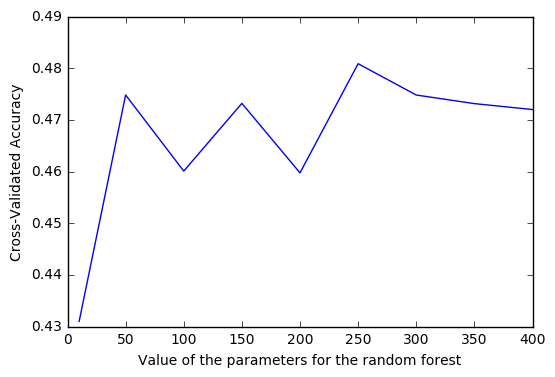

In [35]:
plt.plot(rf_param,rf_scores)
plt.xlabel('Value of the parameters for the random forest')
plt.ylabel('Cross-Validated Accuracy')

idx_best = np.argmax(rf_scores)
print('best accuracy:')
print(np.max(rf_scores))
print('best parameter:')
print(rf_param[idx_best])

#### 2 hyperparameters : number of trees, max_depth

Choices for the number of estimators hyperparameter:

In [30]:
n_estimators_choices = [100,  150, 250, 300, 350, 400]
depth_choices = [5, 10, 15, 20, 25, 30, 35, 40, 45]

num_n_estimators = len(n_estimators_choices)
num_depth = len(depth_choices)


In [31]:
accuracy_tab = np.zeros([num_folds,num_n_estimators])

rf_scores = []
rf_param = []

#Loop for 1st hyperparameter n_estimators
for n_estimators_choices_idx, n_estimators_choices_value in enumerate(n_estimators_choices):
    print('.n_estimators_choices_idx : ',n_estimators_choices_idx+1,'/',num_n_estimators)
    
    #Loop for 2nd hyperparameter max_depth
    for depth_choices_idx, depth_choices_value in enumerate(depth_choices):
        print('..depth_choices_idx : ',depth_choices_idx+1,'/',num_depth)
        
        # Random forest
        rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=n_estimators_choices_value,max_depth=depth_choices_value)
        
        #Scores
        scores = cross_val_score(rand_forest_model, df_x_train, df_y_train, cv=num_folds, scoring='accuracy')
        rf_scores.append(scores.mean())
        rf_param.append([n_estimators_choices_value,depth_choices_value])
        print(scores.mean())


.n_estimators_choices_idx :  1 / 6
..depth_choices_idx :  1 / 9
0.479377025663
..depth_choices_idx :  2 / 9
0.465332635658
..depth_choices_idx :  3 / 9
0.473217653912
..depth_choices_idx :  4 / 9
0.453360456026
..depth_choices_idx :  5 / 9
0.464802348441
..depth_choices_idx :  6 / 9
0.456163859519
..depth_choices_idx :  7 / 9
0.463065278526
..depth_choices_idx :  8 / 9
0.45976781255
..depth_choices_idx :  9 / 9


KeyboardInterrupt: 

In [32]:

# generate 2 2d grids for the x & y bounds
x,y = np.meshgrid(n_estimators_choices,depth_choices,sparse=True)

z=np.zeros((len(y),len(x[0])))

for s in range(0,len(x[0])):
    for t in range(0,len(y)):
        a=np.transpose(x)[s]
        b=y[t]

        c=rf_param.index([a,b])
        z[t,s]=rf_scores[c]                       
z = z[:-1, :-1]

ValueError: [array([100]), array([45])] is not in list

In [ ]:

z_min, z_max = np.abs(z).min(), np.abs(z).max()

plt.pcolor(x, y, z, cmap='Greys', vmin=z_min, vmax=z_max)
plt.title('Cross validated-accuracy in function of number of estimators and depth of tree')
# set the limits of the plot to the limits of the data
plt.colorbar()
plt.ylabel('Depth of tree')
plt.xlabel('Number of trees')



The best predictor seem to be the simplest random forest with a depth of of 5 and 200 estimators.

Let's retrain this model on the whole dataset

In [ ]:
# Random forest
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=150)
df_y = np.asarray(df_y, dtype="|S6")
rand_forest_model.fit(df_x,df_y)



### Plot results of the features importance

In [ ]:
importances = rand_forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, df_x.columns[f], importances[indices[f]]))
plt.figure()

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), df_x.columns[indices])
plt.xlim([-1, df_x.shape[1]])
plt.show()

Let's now remove features that we assume should be useless to determine someone skin color

In [ ]:
#df_x.drop(['ties','defeats','victories','birthday_day','birthday_month','birthday_year'],inplace=True,axis=1,errors='ignore')
df_x.drop(['victories','leagueCountry','birthday_month','birthday_year','birthday_day'],inplace=True,axis=1,errors='ignore')


The random forest will be trained again using the same model parameters

In [ ]:
rand_forest_model.fit(df_x,df_y)


Let's have a look at the features importance now

In [ ]:
importances = rand_forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, df_x.columns[f], importances[indices[f]]))
plt.figure()

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), indices)
plt.xlim([-1, df_x.shape[1]])
plt.show()

The order didn't change at all

## Bonus question

Firstly the learning curve of the best model will be plotted. Using the features that could have an importance in determining a footballer's color skin

In [ ]:
    plt.figure()
    plt.title("Best model")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        rand_forest_model, df_x, df_y, cv=20)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")




Now the learning curve of the worst model will be plotted

First let's determine which was the worst model

In [ ]:
idx_best = np.argmin(rf_scores)
print(np.max(rf_scores))
print(rf_param[idx_best])

The worst model was when using 300 trees and a depth of 15

In [ ]:
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=300,max_depth=15)


In [ ]:
    plt.figure()
    plt.title("Worst model")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        rand_forest_model, df_x, df_y, cv=20)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    axes = plt.gca()
axes.set_ylim([0,1.05])

    plt.legend(loc="best")



As it can be seen the worst model was overfitting a lot, having an accuracy of 1 when training and showing a bad performance when testing on a subset of the data it hasn't trained on